In [1]:
import os
import pandas as pd
import gmaps
import googlemaps as g
import yaml
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import foursquare
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import linear_model


%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

# Loading dataset
df = pd.read_csv(os.path.join('..', 'datasets', 'venue_attributes.csv'))
df = df.set_index('foursquare_id')
df.drop(['Unnamed: 0'],inplace = True, axis = 1)
df.head()


/Users/manulohiya/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,foursquare_name,inspection_score,checkinsCount,createdAt,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount
foursquare_id,,,,,,,,,,,
3fd66200f964a52001ed1ee3,Pacific Cafe,86.0,1389,1071014400,True,True,78,2.0,8.1,59.0,24
3fd66200f964a52005ed1ee3,Taiwan Restaurant 台灣飯店,74.1,2173,1071014400,True,True,185,1.0,7.2,37.0,12
3fd66200f964a52006ed1ee3,Tanuki Restaurant 狸壽司,92.0,1149,1071014400,True,True,46,2.0,7.9,34.0,13
3fd66200f964a52013ed1ee3,Acquerello,98.7,1185,1071014400,True,True,72,4.0,8.5,108.0,41
3fd66200f964a52017ed1ee3,Ebisu,80.0,5047,1071014400,True,True,254,3.0,9.4,307.0,88


In [2]:
df.createdAt.describe()

count         4482.0
mean    1287802459.4
std       91464569.5
min     1071014400.0
25%     1247093230.8
50%     1267637213.0
75%     1344520490.0
max     1503523209.0
Name: createdAt, dtype: float64

In [3]:
df.count()

foursquare_name     4482
inspection_score    4482
checkinsCount       4482
createdAt           4482
hasMenu             4482
isVerified          4482
photos              4482
price               3362
rating              3320
ratingSignals       3320
tipCount            4482
dtype: int64

In [4]:
df.price.value_counts(dropna = False)

1.0    1630
2.0    1406
nan    1120
3.0     271
4.0      55
Name: price, dtype: int64

In [5]:
# Identifying Nulls for the rating attribute
null_data = df[df['rating'].isnull()]
null_data.head()


,foursquare_name,inspection_score,checkinsCount,createdAt,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount
foursquare_id,,,,,,,,,,,
3fd66200f964a520c3ec1ee3,Brisas De Acapulco,86.3,122,1071014400,True,True,2,2.0,nan,nan,1
3fd66200f964a520d2ec1ee3,Russian Bear Restaurant,96.0,1,1071014400,False,True,0,2.0,nan,nan,0
3fd66200f964a520eeec1ee3,Ernestos,91.9,121,1071014400,True,True,0,2.0,nan,nan,2
4192ab80f964a520061e1fe3,Glas Kat,97.0,821,1100131200,False,True,3,3.0,nan,nan,8
43920c94f964a520682b1fe3,Moscone Center,96.4,34935,1133644948,False,True,2855,nan,nan,nan,52


In [6]:
# Drop all rows where price is not available or hasn't yet been rated
df.dropna(subset = ['price'], inplace = True)
df.dropna(subset = ['rating'], inplace = True)
len(df)

2853

In [7]:
df['timeNow']=1503690025
df['timeSinceCreation'] = df['timeNow']-df['createdAt']
df['daysSinceCreation'] = df['timeSinceCreation']/60/60/24.0
df['checkinsPerDay'] = df['checkinsCount']/df['daysSinceCreation']
df.drop(['createdAt'],inplace = True, axis = 1)
df.drop(['timeNow'],inplace = True, axis = 1)
df.drop(['timeSinceCreation'],inplace = True, axis = 1)
df.drop(['daysSinceCreation'],inplace = True, axis = 1)

# df = df.set_index('foursquare_id')
# df.rename(columns={'foursquare_id': 'foursquareId'})
# df.rename(columns={'foursquare_name': 'foursquareName'})
# df.rename(columns={'inspection_score': 'inspectionScore'})
# df.rename(index=str, columns={"A": "a", "B": "c"})
df



,foursquare_name,inspection_score,checkinsCount,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount,checkinsPerDay
foursquare_id,,,,,,,,,,,
3fd66200f964a52001ed1ee3,Pacific Cafe,86.0,1389,True,True,78,2.0,8.1,59.0,24,0.3
3fd66200f964a52005ed1ee3,Taiwan Restaurant 台灣飯店,74.1,2173,True,True,185,1.0,7.2,37.0,12,0.4
3fd66200f964a52006ed1ee3,Tanuki Restaurant 狸壽司,92.0,1149,True,True,46,2.0,7.9,34.0,13,0.2
3fd66200f964a52013ed1ee3,Acquerello,98.7,1185,True,True,72,4.0,8.5,108.0,41,0.2
3fd66200f964a52017ed1ee3,Ebisu,80.0,5047,True,True,254,3.0,9.4,307.0,88,1.0
3fd66200f964a52018f11ee3,Durty Nelly's,93.1,2275,False,True,103,2.0,7.5,78.0,20,0.5
3fd66200f964a52019f11ee3,Art's Cafe,92.5,3775,True,True,167,1.0,8.8,190.0,82,0.8
3fd66200f964a5201af11ee3,Grubstake Diner,98.0,6945,True,True,193,2.0,8.1,271.0,108,1.4
3fd66200f964a5201bed1ee3,Fringale,88.6,2067,True,True,76,3.0,7.7,93.0,23,0.4


In [8]:
df = df*1
df.hasMenu = df.hasMenu*1.0
df.isVerified = df.hasMenu*1.0

df[df['foursquare_name'] == 'Burma Superstar']


,foursquare_name,inspection_score,checkinsCount,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount,checkinsPerDay
foursquare_id,,,,,,,,,,,
42cc7080f964a520e7251fe3,Burma Superstar,89.8,15404,1.0,1.0,599,2.0,9.3,1139.0,345,3.5


In [9]:
corr = df.corr()
corr

,inspection_score,checkinsCount,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount,checkinsPerDay
inspection_score,1.0,0.0,-0.1,-0.1,0.0,0.0,0.1,0.0,0.0,0.1
checkinsCount,0.0,1.0,0.2,0.2,0.9,0.1,0.4,0.9,0.9,0.9
hasMenu,-0.1,0.2,1.0,1.0,0.2,0.2,0.1,0.2,0.2,0.1
isVerified,-0.1,0.2,1.0,1.0,0.2,0.2,0.1,0.2,0.2,0.1
photos,0.0,0.9,0.2,0.2,1.0,0.2,0.4,0.9,0.9,0.8
price,0.0,0.1,0.2,0.2,0.2,1.0,0.3,0.2,0.2,0.1
rating,0.1,0.4,0.1,0.1,0.4,0.3,1.0,0.5,0.5,0.4
ratingSignals,0.0,0.9,0.2,0.2,0.9,0.2,0.5,1.0,1.0,0.9
tipCount,0.0,0.9,0.2,0.2,0.9,0.2,0.5,1.0,1.0,0.8
checkinsPerDay,0.1,0.9,0.1,0.1,0.8,0.1,0.4,0.9,0.8,1.0


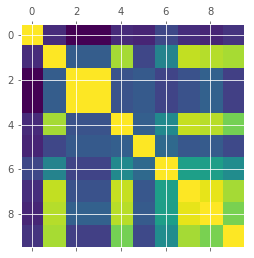

In [10]:
plt.matshow(corr)

In [11]:
# Dropping features that are collinear
df.drop(['checkinsCount'],inplace = True, axis = 1)
df.drop(['tipCount'],inplace = True, axis = 1)
df.drop(['photos'],inplace = True, axis = 1)
df.drop(['isVerified'],inplace = True, axis = 1)

In [12]:
corr = df.corr()
corr

,inspection_score,hasMenu,price,rating,ratingSignals,checkinsPerDay
inspection_score,1.0,-0.1,0.0,0.1,0.0,0.1
hasMenu,-0.1,1.0,0.2,0.1,0.2,0.1
price,0.0,0.2,1.0,0.3,0.2,0.1
rating,0.1,0.1,0.3,1.0,0.5,0.4
ratingSignals,0.0,0.2,0.2,0.5,1.0,0.9
checkinsPerDay,0.1,0.1,0.1,0.4,0.9,1.0


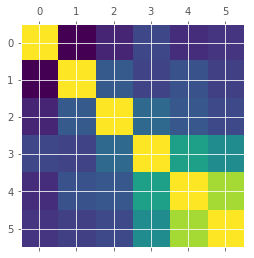

In [13]:
plt.matshow(corr)

In [14]:
# Splitting into test and train datasets

df_train, df_test = train_test_split(df,test_size=0.4, random_state=42)

Lets go through each feature and understand the relationship with number of checkins/day

In [15]:
df_train.describe()

,inspection_score,hasMenu,price,rating,ratingSignals,checkinsPerDay
count,1711.0,1711.0,1711.0,1711.0,1711.0,1711.0
mean,88.6,0.6,1.7,7.5,178.9,1.4
std,7.4,0.5,0.7,1.1,296.7,1.9
min,56.0,0.0,1.0,4.5,0.0,0.0
25%,84.2,0.0,1.0,6.6,32.0,0.4
50%,89.9,1.0,2.0,7.5,76.0,0.8
75%,94.0,1.0,2.0,8.4,196.0,1.7
max,100.0,1.0,4.0,9.5,3308.0,19.9


In [16]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', df.shape[0]

    Q1 = df.checkinsPerDay.quantile(.25)
    Q2 = df.checkinsPerDay.quantile(.5)
    Q3 = df.checkinsPerDay.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, 
    print '- Q2/Median  =', Q2, 
    print '- Q3         =', Q3, 

    df.drop(df[(df.checkinsPerDay < Q1 - 1.5 * IQR) | (df.checkinsPerDay > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', df.shape[0]

drop_outliers(df_train)

Dropping outliers
- n (before) = 1711
- Q1         = 0.352870550976 - Q2/Median  = 0.808205033085 - Q3         = 1.74977079757 - n (after)  = 1581


/Users/manulohiya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


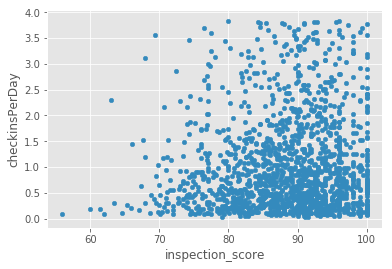

In [17]:
df_train.plot.scatter(x='inspection_score', y = 'checkinsPerDay')

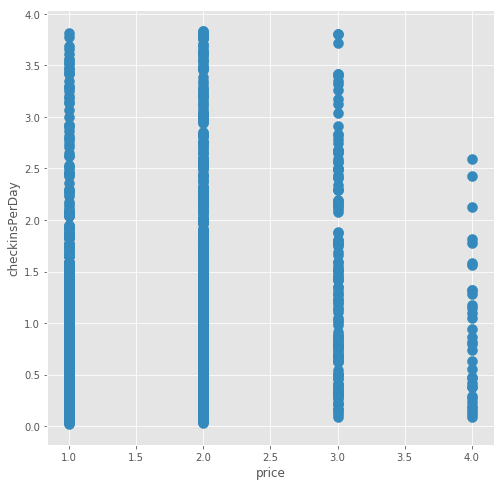

In [18]:
# Plotting each feature against checkins per day
df_train.plot.scatter(x = 'price', y = 'checkinsPerDay', s = 100, figsize = (8, 8))

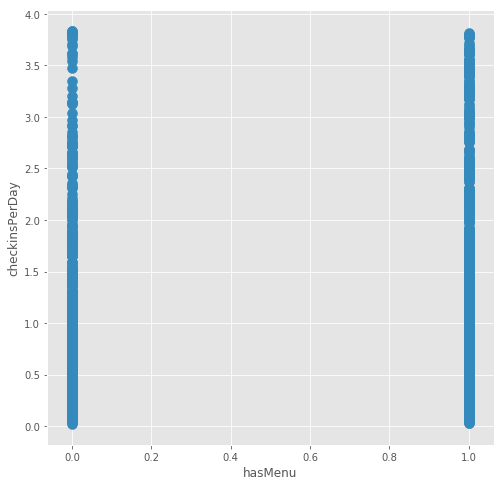

In [19]:
# Plotting each feature against checkins per day
df_train.plot.scatter(x = 'hasMenu', y = 'checkinsPerDay', s = 100, figsize = (8, 8))

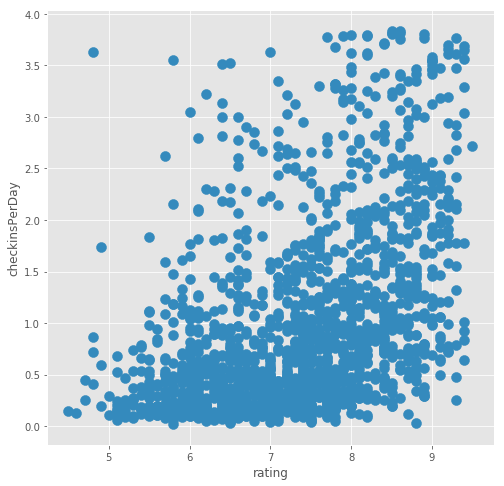

In [20]:
# Plotting each feature against checkins per day
df_train.plot.scatter(x = 'rating', y = 'checkinsPerDay', s = 100, figsize = (8, 8))

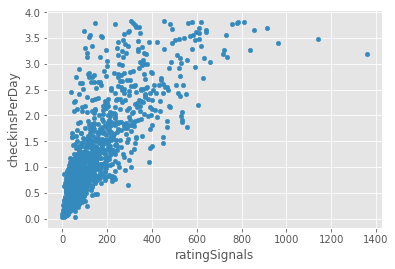

In [21]:
df_train.plot.scatter(x='ratingSignals', y = 'checkinsPerDay')

In [22]:
model = smf.ols(formula = 'checkinsPerDay ~ ratingSignals', data = df_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         checkinsPerDay   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2996.
Date:                Sat, 26 Aug 2017   Prob (F-statistic):               0.00
Time:                        14:47:47   Log-Likelihood:                -1247.2
No. Observations:                1581   AIC:                             2498.
Df Residuals:                    1579   BIC:                             2509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3996      0.018     22.790      0.000       0.365       0.434
ratingSignals     0.0051   9.35e-05     54.737      0.000       0.005       0.005
==============================================================================
Omnibus:                      464.682   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3314.647
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                       9.690   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks like ratingSignals has a linear relationship with checkinsPerDay. Lets add a few more variables and see if we can improve

In [32]:
model = smf.ols(formula = 'checkinsPerDay ~ hasMenu', data = df_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         checkinsPerDay   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     28.88
Date:                Sat, 26 Aug 2017   Prob (F-statistic):           8.85e-08
Time:                        14:55:37   Log-Likelihood:                -2073.9
No. Observations:                1581   AIC:                             4152.
Df Residuals:                    1579   BIC:                             4162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8782      0.035     25.421      0.000       0.810       0.946
hasMenu        0.2455      0.046      5.374      0.000       0.156       0.335
==============================================================================
Omnibus:                      296.749   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.801
Skew:                           1.270   Prob(JB):                    1.45e-105
Kurtosis:                       3.938   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model = smf.ols(formula = 'checkinsPerDay ~ inspection_score', data = df_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         checkinsPerDay   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.551
Date:                Sat, 26 Aug 2017   Prob (F-statistic):            0.00350
Time:                        14:57:10   Log-Likelihood:                -2083.9
No. Observations:                1581   AIC:                             4172.
Df Residuals:                    1579   BIC:                             4183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2323      0.270      0.861      0.390      -0.297       0.762
inspection_score     0.0089      0.003      2.924      0.004       0.003       0.015
==============================================================================
Omnibus:                      294.321   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.473
Skew:                           1.267   Prob(JB):                    3.43e-104
Kurtosis:                       3.902   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model = smf.ols(formula = 'checkinsPerDay ~ price', data = df_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         checkinsPerDay   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     81.75
Date:                Sat, 26 Aug 2017   Prob (F-statistic):           4.41e-19
Time:                        14:58:08   Log-Likelihood:                -2048.3
No. Observations:                1581   AIC:                             4101.
Df Residuals:                    1579   BIC:                             4111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5551      0.056      9.935      0.000       0.446       0.665
price          0.2789      0.031      9.042      0.000       0.218       0.339
==============================================================================
Omnibus:                      301.834   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.964
Skew:                           1.265   Prob(JB):                    4.48e-109
Kurtosis:                       4.083   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model = smf.ols(formula = 'checkinsPerDay ~ ratingSignals + hasMenu + inspection_score', data = df_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         checkinsPerDay   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sat, 26 Aug 2017   Prob (F-statistic):               0.00
Time:                        15:01:21   Log-Likelihood:                -1239.0
No. Observations:                1581   AIC:                             2486.
Df Residuals:                    1577   BIC:                             2508.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0762      0.162     -0.472      0.637      -0.393       0.241
ratingSignals        0.0052   9.53e-05     54.043      0.000       0.005       0.005
hasMenu             -0.0586      0.028     -2.111      0.035      -0.113      -0.004
inspection_score     0.0057      0.002      3.181      0.001       0.002       0.009
==============================================================================
Omnibus:                      452.147   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3238.414
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       9.630   Cond. No.                     2.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""